 L'apport principal de la bibliothèque Pandas est les tableaux. Mais tout comme Numy offre les tables et de nombreuses
 méthodes permettant d'effectuer des calculs dessus, Pandas offre aussi quelques outils. Les principaux concernent :
 
 * la transformation des données
 * les statistiques
 * les graphique

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(1000, 4),  # random variation everyday, an array of 1000 x 4
                   columns=['A', 'B', 'C', 'D'],
                   index=pd.date_range('1/1/2000', periods=1000))
df = df.cumsum()  # cumulative sum to make something like a regular variation (temperature, stock...)
df

,A,B,C,D
2000-01-01,-1.326705,-1.799746,0.206209,0.972055
2000-01-02,-2.411895,-2.706063,0.748677,1.268359
2000-01-03,-3.046458,-4.781553,1.955749,1.839322
2000-01-04,-1.644270,-6.375918,2.042194,0.039137
2000-01-05,-2.724453,-6.544290,1.465327,1.892827
...,...,...,...,...
2002-09-22,-11.482703,-18.557281,26.519622,-7.636293
2002-09-23,-12.244696,-17.886932,25.274393,-8.674248
2002-09-24,-12.789410,-18.386558,24.491559,-8.261955
2002-09-25,-13.200432,-16.672515,22.751370,-8.455967


Lorsqu'on veut voir un dataframe entièrement (sans les ...), il faut modifier ces variables
d'environnement de Pandas :

```
pd.options.display.max_columns = None
pd.options.display.max_rows = None
```

Bien sûr on peut mettre un nombre à la place de None.

## Modifier les données

On a vu qu'il est possible d'effectuer des opérations arithmétiques sur les tableaux et sur leurs colonnes comme
on le fait avec Numpy sur des tables.

In [2]:
df['M'] = (df.A + df.B + df.C + df.D) / 4   # ou  df['M'] = df.mean(axis=1)
df.head()

,A,B,C,D,M
2000-01-01,-1.326705,-1.799746,0.206209,0.972055,-0.487047
2000-01-02,-2.411895,-2.706063,0.748677,1.268359,-0.775230
2000-01-03,-3.046458,-4.781553,1.955749,1.839322,-1.008235
2000-01-04,-1.644270,-6.375918,2.042194,0.039137,-1.484714
2000-01-05,-2.724453,-6.544290,1.465327,1.892827,-1.477647


Modifier une colonne revient à la mettre à gauche du signe égal : `df.A = df.A + 2`.

### Appliquer une fonction

On peut aussi appliquer une fonction vectorielle au tableau ce qui revient à l'appliquer a toutes ses colonnes
une par une (ou à toutes ses lignes avec `axis=1`).

In [3]:
df['M'] = df.apply(np.mean, axis=1)
df.head()

,A,B,C,D,M
2000-01-01,-1.326705,-1.799746,0.206209,0.972055,-0.487047
2000-01-02,-2.411895,-2.706063,0.748677,1.268359,-0.775230
2000-01-03,-3.046458,-4.781553,1.955749,1.839322,-1.008235
2000-01-04,-1.644270,-6.375918,2.042194,0.039137,-1.484714
2000-01-05,-2.724453,-6.544290,1.465327,1.892827,-1.477647


In [4]:
def mean_deviation(w):
    try:
        return np.abs(w - w.mean()).mean()
    except:
        return np.nan
    
df.apply(mean_deviation)

A    12.538960
B     5.310016
C     8.230457
D     9.090636
M     4.282959
dtype: float64

## Statistiques d'un tableau

La méthode qui résume tout est `describe`.

In [5]:
df.describe()  # get statistics

,A,B,C,D,M
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-22.647754,-15.815469,10.438440,-16.122456,-11.036809
std,14.300922,6.626280,9.515799,10.834268,5.103935
min,-51.945855,-31.518593,-5.418918,-41.730301,-20.407083
25%,-35.988572,-20.177954,1.904832,-23.885170,-15.258789
50%,-21.182620,-15.961242,8.843313,-17.053027,-10.592751
75%,-9.511440,-11.027679,17.357112,-8.324899,-7.478864
max,3.660071,1.659530,30.515290,8.624897,0.513503


Plus en détail Pandas fournit ces méthodes que le lecteur pourra tester :

```
count()    Number of non-null observations
sum()      Sum of values
mean()     Mean of values
median()   Arithmetic median of values
min()      Minimum
max()      Maximum
std()      Bessel-corrected sample standard deviation
var()      Unbiased variance
skew()     Sample skewness (3rd moment)
kurt()     Sample kurtosis (4th moment)
quantile() Sample quantile (value at %)
cov()      Unbiased covariance (binary)
corr()     Correlation (binary)
```

In [6]:
df.quantile(0.1)

A   -43.318447
B   -24.716663
C    -1.086762
D   -29.971758
M   -18.174820
Name: 0.1, dtype: float64

#### Pandas profiling

Il existe aussi la bibliothèque [Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling) pour faire
une analyse statistique plus complète d'un jeu de donnée (voir [cet exemple](https://nbviewer.jupyter.org/github/JosPolfliet/pandas-profiling/blob/master/examples/meteorites.ipynb)).

##  Graphiques

Les graphiques sont un outil primordial pour comprendre les données aussi le prochain chapitre est entièrement
consacré aux différentes bibliothèques qui permettent de faire de jolis graphiques.

En attendant Pandas intègre la fonction de tracé [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) qui est souvent suffisante.
Il n'est pas nécessaire de rentrer dans les détails de cette fonction pour l'instant. Elle fonctionne comme
la même fonction de la bibliothèque Matplotlib que l'on verra au prochain chapitre.

Note : sous Jupyter il est nécessaire d'indiquer `%matplotlib inline` pour que les graphiques s'affichent (à ne faire
qu'une fois par feuille). Si vous avez un écran en 4K voire moins utilisez le mode `retina` pour avoir un rendu
plus joli.

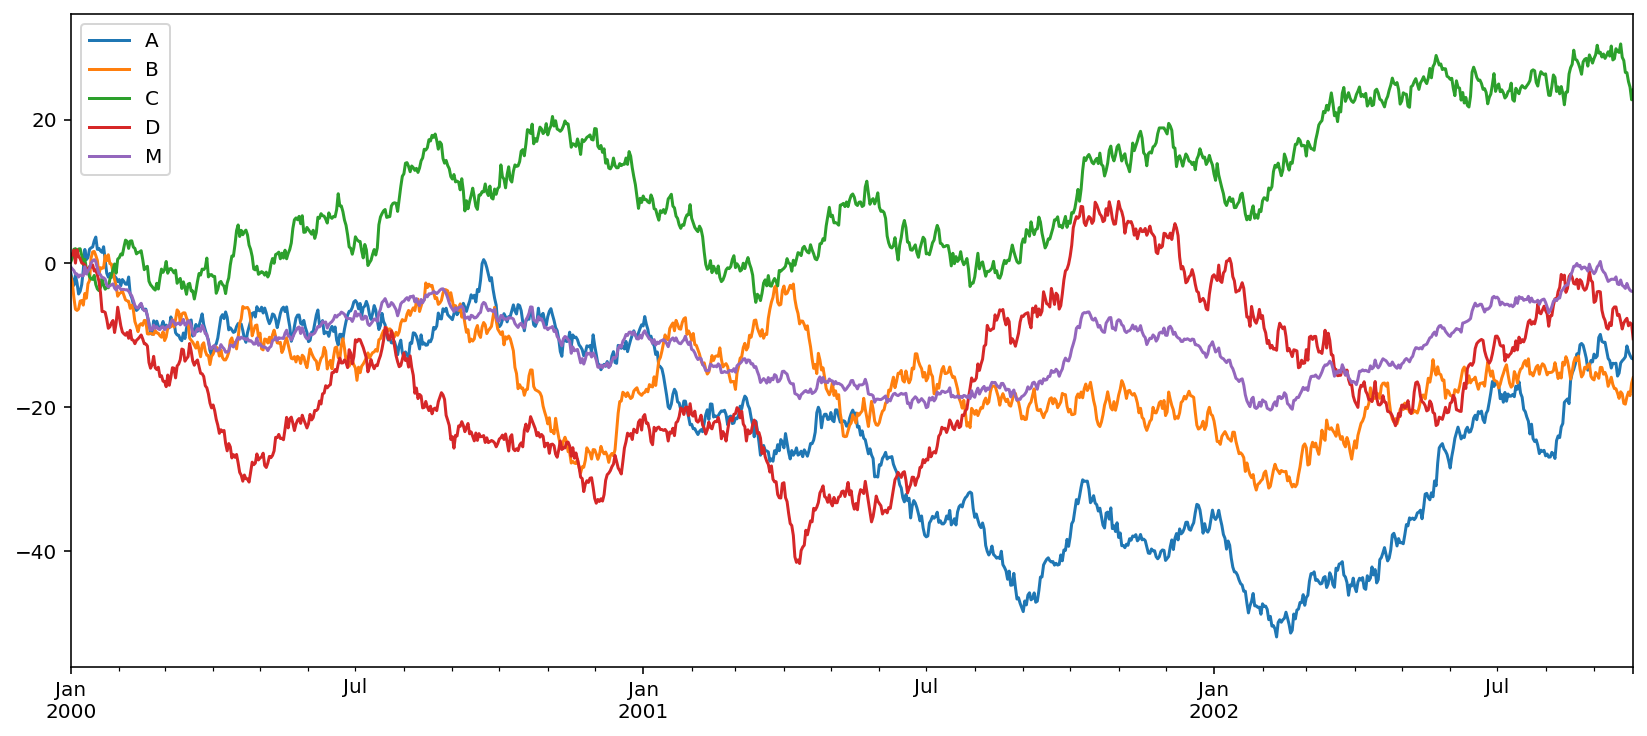

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df.plot(figsize=(14,6))

### Fenêtre glissante

Un outil bien utile de Pandas pour préparer des données que l'on désire tracer est la fenêtre glissante sur laquelle
on applique une fonction de son choix (souvent la moyenne mais l'ensemble des fonctions
statistiques citées ci-dessus peuvent être utilisées).

La taille de la fenêtre est

* un entier qui indique le nombre de lignes choisies
* un intervalle temporel (seulement pour les tableaux chronologiques)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76484f4128>,
      dtype=object)

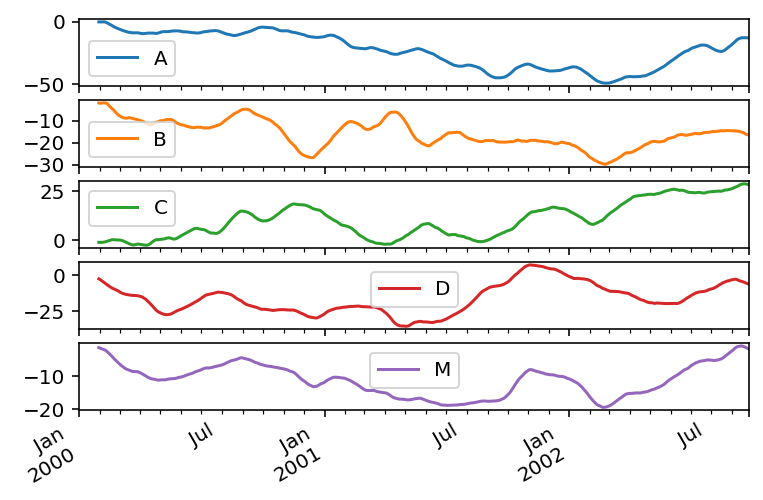

In [8]:
df.rolling(window=30).mean().plot(subplots=True)

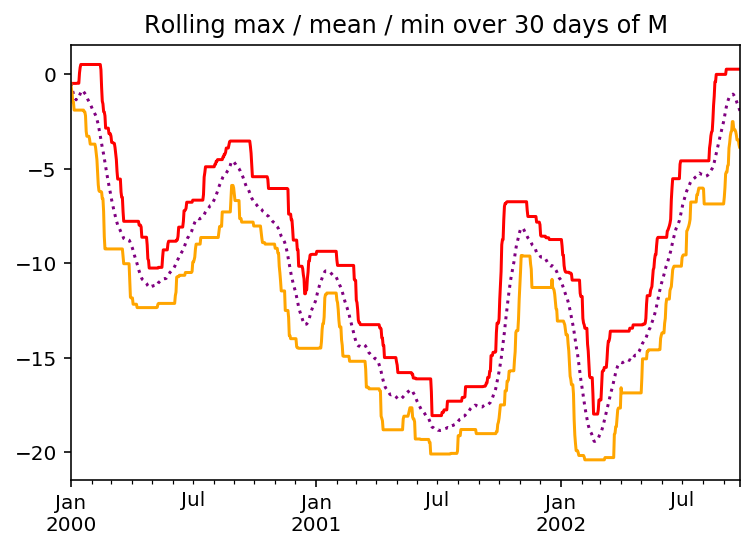

In [9]:
df['M'].rolling('30d').max().plot(color='red')
df['M'].rolling('30d').mean().plot(color='purple', style=':')
df['M'].rolling('30d').min().plot(title="Rolling max / mean / min over 30 days of M", color='orange')

On peut aussi faire des statistiques sur des fenêtres glissantes :

In [10]:
df.A.cov(df.A.rolling(window=30).mean())

189.48042952406163

{{ PreviousNext("pd07 -- Time dataframes.ipynb", "pd10 -- Getting data.ipynb")}}